Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_boston

Создайте датафреймы X и y из этих данных.

In [5]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]
X = pd.DataFrame(data,columns=feature_names)
y = pd.DataFrame(target,columns=["price"])

Задание 1. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trn_sc = scaler.fit_transform(X_train)
X_trn_sc = pd.DataFrame(X_trn_sc,columns=X_train.columns)
X_tst_sc = scaler.fit_transform(X_test)  # 
X_tst_sc = pd.DataFrame(X_tst_sc,columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

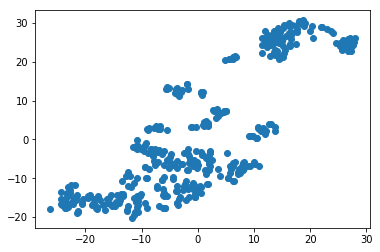

In [51]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_trn_tsne = tsne.fit_transform(X_trn_sc)
X_tst_tsne = tsne.fit_transform(X_tst_sc)
plt.scatter(X_trn_tsne[:,0],X_trn_tsne[:,1])

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

Text(10, 18, 'Кластер 2')

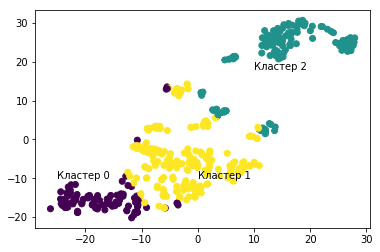

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,max_iter=100,random_state=42)
labels_trn = kmeans.fit_predict(X_trn_sc)
pd.value_counts(labels_trn)

plt.scatter(X_trn_tsne[:,0],X_trn_tsne[:,1],c=labels_trn)
plt.text(-25,-10,'Кластер 0')
plt.text( -0,-10,'Кластер 1')
plt.text( 10, 18,'Кластер 2')

In [38]:
y_train[labels_trn==0].mean()

price    27.788372
dtype: float64

In [39]:
y_train[labels_trn==1].mean()

price    16.165354
dtype: float64

In [40]:
y_train[labels_trn==2].mean()

price    24.958115
dtype: float64

Задание 3. Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

Text(20, 30, 'Кластер 2')

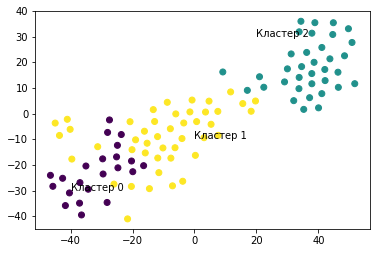

In [57]:
labels_tst = kmeans.predict(X_tst_sc)
pd.value_counts(labels_tst)
plt.scatter(X_tst_tsne[:,0],X_tst_tsne[:,1],c=labels_tst)
plt.text(-40,-30,'Кластер 0')
plt.text( -0,-10,'Кластер 1')
plt.text( 20, 30,'Кластер 2')

In [53]:
y_test[labels_tst==0].mean()

price    28.413636
dtype: float64

In [54]:
y_test[labels_tst==1].mean()

price    16.437143
dtype: float64

In [55]:
y_test[labels_tst==2].mean()

price    22.031111
dtype: float64